===================== 測試 Brute-Force & Dynamic Programming Algorithm ======================
Input 為：[40, 28, 46, 7, 13, 22, 11]
Brute Force 之矩陣相乘鏈所需的最小乘法次數: 23632
Brute Force 之最佳的矩陣相乘表達式: ((A1(A2A3))((A4A5)A6))
Brute Force Running Time:3.819999983534217e-05
Dynamic Programming 之矩陣相乘鏈所需的最小乘法次數: 23632
Dynamic Programming 之最佳的矩陣相乘表達式: ((A1(A2A3))((A4A5)A6))
Dynamic Programming Running Time:5.650000093737617e-05

Input 為：[30, 35, 15, 5, 10, 20, 25]
Brute Force 之矩陣相乘鏈所需的最小乘法次數: 15125
Brute Force 之最佳的矩陣相乘表達式: ((A1(A2A3))((A4A5)A6))
Brute Force Running Time:3.7800004065502435e-05
Dynamic Programming 之矩陣相乘鏈所需的最小乘法次數: 15125
Dynamic Programming 之最佳的矩陣相乘表達式: ((A1(A2A3))((A4A5)A6))
Dynamic Programming Running Time:4.0599996282253414e-05

Input 為：[1, 2, 3, 4, 5, 6, 7]
Brute Force 之矩陣相乘鏈所需的最小乘法次數: 110
Brute Force 之最佳的矩陣相乘表達式: (((((A1A2)A3)A4)A5)A6)
Brute Force Running Time:2.6900001103058457e-05
Dynamic Programming 之矩陣相乘鏈所需的最小乘法次數: 110
Dynamic Programming 之最佳的矩陣相乘表達式: (((((A1A2)A3)A4)A5)A6)
Dynamic 

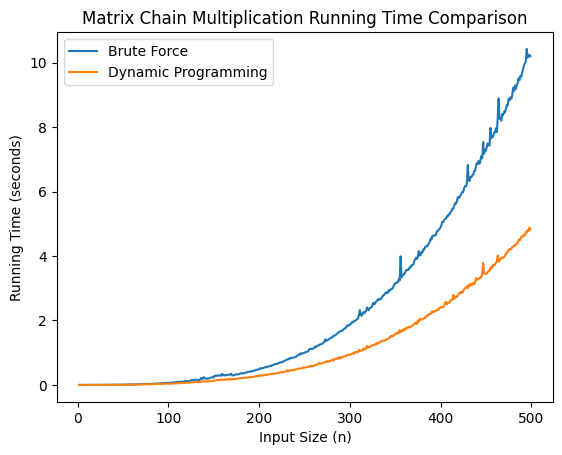

========================================== Conclusion ===========================================

Dynamic Programming Algorithm 由於其多項式時間複雜度，在較大的輸入大小上，表現比 Brute-Force Algorithm 明顯地優秀許多。
因為隨著輸入大小的增加，Brute-Force Algorithm 的運行時間呈指數級增長，而 Dynamic Programming Algorithm 的運行時間增長得更緩慢
．Brute-Force Algorithm 之時間複雜度：O(n!)
．Dynamic Programming Algorithm 之時間複雜度：O(n^3)


In [39]:
import sys
from itertools import permutations
from functools import lru_cache
import timeit
import matplotlib.pyplot as plt

def matrix_chain_brute_force(P):
    n = len(P) - 1

    @lru_cache(None)
    def recursive_helper(i, j):
        if i == j:
            return 0, f"A{i}"
        min_cost = sys.maxsize
        best_order = None
        for k in range(i, j):
            cost_left, order_left = recursive_helper(i, k)
            cost_right, order_right = recursive_helper(k + 1, j)
            cost = cost_left + cost_right + P[i - 1] * P[k] * P[j]
            if cost < min_cost:
                min_cost = cost
                best_order = f"({order_left}{order_right})"
        return min_cost, best_order

    return recursive_helper(1, n)

def matrix_chain_dynamic(P):
    n = len(P) - 1
    m = [[0 for _ in range(n + 1)] for _ in range(n + 1)]
    s = [[0 for _ in range(n + 1)] for _ in range(n + 1)]

    for l in range(2, n + 1):
        for i in range(1, n - l + 2):
            j = i + l - 1
            m[i][j] = sys.maxsize
            for k in range(i, j):
                temp_cost = m[i][k] + m[k + 1][j] + P[i - 1] * P[k] * P[j]
                if temp_cost < m[i][j]:
                    m[i][j] = temp_cost
                    s[i][j] = k

    def construct_order(i, j):
        if i == j:
            return f"A{i}"
        k = s[i][j]
        left = construct_order(i, k)
        right = construct_order(k + 1, j)
        return f"({left}{right})"

    return m[1][n], construct_order(1, n)

# Test both algorithms
print("===================== 測試 Brute-Force & Dynamic Programming Algorithm ======================")

P = [
    [40, 28, 46, 7, 13, 22, 11],
    [30, 35, 15, 5, 10, 20, 25],
    [1, 2, 3, 4, 5, 6, 7]
]

for p in P:
    print(f"Input 為：{p}")

    start_time = timeit.default_timer()
    optimal_cost, optimal_order = matrix_chain_brute_force(tuple(p))
    end_time = timeit.default_timer()
    print("Brute Force 之矩陣相乘鏈所需的最小乘法次數:", optimal_cost)
    print("Brute Force 之最佳的矩陣相乘表達式:", optimal_order)
    print(f"Brute Force Running Time:{end_time - start_time}")

    start_time = timeit.default_timer()
    optimal_cost, optimal_order = matrix_chain_dynamic(p)
    end_time = timeit.default_timer()
    print("Dynamic Programming 之矩陣相乘鏈所需的最小乘法次數:", optimal_cost)
    print("Dynamic Programming 之最佳的矩陣相乘表達式:", optimal_order)
    print(f"Dynamic Programming Running Time:{end_time - start_time}")
    print()

# Measure running time
bf_times = []
dp_times = []
n_values = [i for i in range(2, 500)]
print("=============================================================================================\n")

print("======================================= 執行時間比較 =========================================")

for n in n_values:
    P = [i for i in range(1, n + 1)]
    P.append(n + 1)
    P = tuple(P)

    print(f"n = {n}")

    start_time = timeit.default_timer()
    matrix_chain_brute_force(P)
    end_time = timeit.default_timer()
    print(f"Bf Time:{end_time - start_time}")
    bf_times.append(end_time - start_time)

    start_time = timeit.default_timer()
    matrix_chain_dynamic(P)
    end_time = timeit.default_timer()
    print(f"DP Time:{end_time - start_time}")
    dp_times.append(end_time - start_time)

    print("=============================================================================================")

print()

# 繪製圖表
plt.plot(n_values, bf_times, label='Brute Force')
plt.plot(n_values, dp_times, label='Dynamic Programming')
plt.xlabel('Input Size (n)')
plt.ylabel('Running Time (seconds)')
plt.legend()
plt.title('Matrix Chain Multiplication Running Time Comparison')
plt.show()

# Conclusion
print("========================================== Conclusion ===========================================\n")
print("Dynamic Programming Algorithm 由於其多項式時間複雜度，在較大的輸入大小上，表現比 Brute-Force Algorithm 明顯地優秀許多。\n因為隨著輸入大小的增加，Brute-Force Algorithm 的運行時間呈指數級增長，而 Dynamic Programming Algorithm 的運行時間增長得更緩慢")
print("．Brute-Force Algorithm 之時間複雜度：O(n!)\n．Dynamic Programming Algorithm 之時間複雜度：O(n^3)")